# CHRONOS Dimension Validation

**CHRONOS (⏳)** - Patience, Timing, and Flow

## Purpose
Validate the CHRONOS dimension using HEXACO Agreeableness factor (A-factor).

## Source
- **Dataset**: HEXACO personality inventory
- **Sample**: ~20,000 responses from openpsychometrics.org
- **Scale**: 7-point Likert (1=Strongly Disagree to 7=Strongly Agree)

## HEXACO Agreeableness Mapping
CHRONOS captures patience, emotional regulation, and interpersonal harmony:

**A-Factor (Agreeableness) - 40 items across 4 subfacets:**
1. **Forgiveness (AForg)** - 10 items: Willingness to forgive, trust, letting go of grudges
2. **Gentleness (AGent)** - 10 items: Non-judgmental, accepting, kind speech
3. **Flexibility (AFlex)** - 10 items: Adaptability, openness to criticism, easy to convince
4. **Patience (APati)** - 10 items: Slow to anger, rarely irritated, emotional stability

## Validation Goals
- Calculate Cronbach's alpha for overall A-factor
- Assess reliability of each subfacet
- Examine subfacet correlations
- Evaluate distribution and descriptive statistics
- Target: α > 0.75 (acceptable), ideally α > 0.80 (good)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load HEXACO dataset
data_path = '/home/chris/selve/data/openpsychometrics-rawdata/HEXACO/data.csv'
df = pd.read_csv(data_path, sep='\t')

print(f"Dataset loaded: {df.shape[0]:,} responses, {df.shape[1]} columns")
print(f"\nColumn names preview: {df.columns.tolist()[:20]}")

Dataset loaded: 22,786 responses, 244 columns

Column names preview: ['HSinc1', 'HSinc2', 'HSinc3', 'HSinc4', 'HSinc5', 'HSinc6', 'HSinc7', 'HSinc8', 'HSinc9', 'HSinc10', 'HFair1', 'HFair2', 'HFair3', 'HFair4', 'HFair5', 'HFair6', 'HFair7', 'HFair8', 'HFair9', 'HFair10']


/tmp/ipykernel_56509/1422437719.py:3: DtypeWarning: Columns (243) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t')


In [3]:
# Define CHRONOS items (HEXACO Agreeableness A-factor)
# 4 subfacets × 10 items each = 40 items total

# Forgiveness (AForg) - 10 items
aforg_items = ['AForg1', 'AForg2', 'AForg3', 'AForg4', 'AForg5', 
               'AForg6', 'AForg7', 'AForg8', 'AForg9', 'AForg10']

# Gentleness (AGent) - 10 items
agent_items = ['AGent1', 'AGent2', 'AGent3', 'AGent4', 'AGent5',
               'AGent6', 'AGent7', 'AGent8', 'AGent9', 'AGent10']

# Flexibility (AFlex) - 10 items
aflex_items = ['AFlex1', 'AFlex2', 'AFlex3', 'AFlex4', 'AFlex5',
               'AFlex6', 'AFlex7', 'AFlex8', 'AFlex9', 'AFlex10']

# Patience (APati) - 10 items
apati_items = ['APati1', 'APati2', 'APati3', 'APati4', 'APati5',
               'APati6', 'APati7', 'APati8', 'APati9', 'APati10']

# All CHRONOS items (A-factor)
chronos_items = aforg_items + agent_items + aflex_items + apati_items

print(f"Total CHRONOS items: {len(chronos_items)}")
print(f"  - Forgiveness: {len(aforg_items)} items")
print(f"  - Gentleness: {len(agent_items)} items")
print(f"  - Flexibility: {len(aflex_items)} items")
print(f"  - Patience: {len(apati_items)} items")

Total CHRONOS items: 40
  - Forgiveness: 10 items
  - Gentleness: 10 items
  - Flexibility: 10 items
  - Patience: 10 items


In [4]:
# Check which items need reverse scoring
# Based on HEXACO documentation, these items are negatively keyed:
reverse_items = [
    # Forgiveness (reverse: holding grudges, distrust, revenge)
    'AForg5', 'AForg6', 'AForg7', 'AForg8', 'AForg9', 'AForg10',
    # Gentleness (reverse: judging, criticizing, fault-finding)
    'AGent5', 'AGent6', 'AGent7', 'AGent8', 'AGent9', 'AGent10',
    # Flexibility (reverse: stubborn, hard to convince, rigid)
    'AFlex3', 'AFlex4', 'AFlex5', 'AFlex6', 'AFlex7', 'AFlex8', 'AFlex9', 'AFlex10',
    # Patience (reverse: get angry easily, irritated, upset)
    'APati6', 'APati7', 'APati8', 'APati9', 'APati10'
]

print(f"Items requiring reverse scoring: {len(reverse_items)}/40")
print(f"  - Forgiveness: 6 items")
print(f"  - Gentleness: 6 items")
print(f"  - Flexibility: 8 items")
print(f"  - Patience: 5 items")

Items requiring reverse scoring: 25/40
  - Forgiveness: 6 items
  - Gentleness: 6 items
  - Flexibility: 8 items
  - Patience: 5 items


In [5]:
# Extract CHRONOS items and clean data
chronos_df = df[chronos_items].copy()

# Check for missing values
missing_count = chronos_df.isnull().sum().sum()
print(f"Missing values: {missing_count}")

# Remove rows with any missing values in CHRONOS items
chronos_df_clean = chronos_df.dropna()
print(f"Valid responses: {len(chronos_df_clean):,} (after removing missing)")

# Verify scale (should be 1-7)
print(f"\nValue range: {chronos_df_clean.min().min():.0f} to {chronos_df_clean.max().max():.0f}")

Missing values: 0
Valid responses: 22,786 (after removing missing)

Value range: 0 to 7


In [6]:
# Apply reverse scoring (7-point scale: 1→7, 2→6, 3→5, 4→4, 5→3, 6→2, 7→1)
chronos_df_scored = chronos_df_clean.copy()

for item in reverse_items:
    chronos_df_scored[item] = 8 - chronos_df_scored[item]

print("✅ Reverse scoring applied to negatively keyed items")
print(f"\nSample values after reverse scoring:")
print(chronos_df_scored[reverse_items[:3]].head())

✅ Reverse scoring applied to negatively keyed items

Sample values after reverse scoring:
   AForg5  AForg6  AForg7
0       3       3       3
1       1       3       2
2       5       4       4
3       4       5       5
4       5       3       2


In [7]:
# Calculate Cronbach's Alpha for overall CHRONOS (A-factor)
def cronbach_alpha(df):
    """Calculate Cronbach's alpha for internal consistency reliability"""
    # Number of items
    k = df.shape[1]
    
    # Variance of total scores
    total_variance = df.sum(axis=1).var()
    
    # Sum of item variances
    item_variance_sum = df.var(axis=0).sum()
    
    # Cronbach's alpha formula
    alpha = (k / (k - 1)) * (1 - item_variance_sum / total_variance)
    
    return alpha

# Calculate alpha for each subfacet
alpha_aforg = cronbach_alpha(chronos_df_scored[aforg_items])
alpha_agent = cronbach_alpha(chronos_df_scored[agent_items])
alpha_aflex = cronbach_alpha(chronos_df_scored[aflex_items])
alpha_apati = cronbach_alpha(chronos_df_scored[apati_items])

# Calculate alpha for overall A-factor (CHRONOS)
alpha_chronos = cronbach_alpha(chronos_df_scored[chronos_items])

print("=" * 60)
print("CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY")
print("=" * 60)
print("📊 SUBFACET RELIABILITIES:")
print(f"AForg      (n={len(aforg_items)}): α = {alpha_aforg:.3f} - {'Excellent ⭐⭐⭐' if alpha_aforg >= 0.90 else 'Good ✅' if alpha_aforg >= 0.80 else 'Acceptable ✓' if alpha_aforg >= 0.70 else 'Questionable ⚠️'}")
print(f"AGent      (n={len(agent_items)}): α = {alpha_agent:.3f} - {'Excellent ⭐⭐⭐' if alpha_agent >= 0.90 else 'Good ✅' if alpha_agent >= 0.80 else 'Acceptable ✓' if alpha_agent >= 0.70 else 'Questionable ⚠️'}")
print(f"AFlex      (n={len(aflex_items)}): α = {alpha_aflex:.3f} - {'Excellent ⭐⭐⭐' if alpha_aflex >= 0.90 else 'Good ✅' if alpha_aflex >= 0.80 else 'Acceptable ✓' if alpha_aflex >= 0.70 else 'Questionable ⚠️'}")
print(f"APati      (n={len(apati_items)}): α = {alpha_apati:.3f} - {'Excellent ⭐⭐⭐' if alpha_apati >= 0.90 else 'Good ✅' if alpha_apati >= 0.80 else 'Acceptable ✓' if alpha_apati >= 0.70 else 'Questionable ⚠️'}")
print("-" * 60)
print(f"A-FACTOR   (n={len(chronos_items)}): α = {alpha_chronos:.3f} - {'Excellent ⭐⭐⭐' if alpha_chronos >= 0.90 else 'Good ✅' if alpha_chronos >= 0.80 else 'Acceptable ✓' if alpha_chronos >= 0.70 else 'Questionable ⚠️'}")
print("=" * 60)

if alpha_chronos >= 0.75:
    print(f"✅ CHRONOS dimension shows {'EXCELLENT' if alpha_chronos >= 0.90 else 'GOOD' if alpha_chronos >= 0.80 else 'ACCEPTABLE'} internal consistency (α > 0.75)")
    print("✅ Ready for inclusion in SELVE framework")
else:
    print(f"⚠️ CHRONOS dimension shows QUESTIONABLE internal consistency (α < 0.75)")
    print("⚠️ Consider revising item selection")

CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY
📊 SUBFACET RELIABILITIES:
AForg      (n=10): α = 0.841 - Good ✅
AGent      (n=10): α = 0.781 - Acceptable ✓
AFlex      (n=10): α = 0.736 - Acceptable ✓
APati      (n=10): α = 0.929 - Excellent ⭐⭐⭐
------------------------------------------------------------
A-FACTOR   (n=40): α = 0.937 - Excellent ⭐⭐⭐
✅ CHRONOS dimension shows EXCELLENT internal consistency (α > 0.75)
✅ Ready for inclusion in SELVE framework


In [8]:
# Calculate subfacet scores (mean of items)
chronos_df_scored['AForg_score'] = chronos_df_scored[aforg_items].mean(axis=1)
chronos_df_scored['AGent_score'] = chronos_df_scored[agent_items].mean(axis=1)
chronos_df_scored['AFlex_score'] = chronos_df_scored[aflex_items].mean(axis=1)
chronos_df_scored['APati_score'] = chronos_df_scored[apati_items].mean(axis=1)
chronos_df_scored['CHRONOS_score'] = chronos_df_scored[chronos_items].mean(axis=1)

print("✅ Subfacet scores calculated")
print(f"\nSample scores:")
print(chronos_df_scored[['AForg_score', 'AGent_score', 'AFlex_score', 'APati_score', 'CHRONOS_score']].head())

✅ Subfacet scores calculated

Sample scores:
   AForg_score  AGent_score  AFlex_score  APati_score  CHRONOS_score
0          1.9          3.7          3.1          4.0          3.175
1          2.3          3.5          3.5          4.3          3.400
2          4.3          4.8          3.7          5.6          4.600
3          4.0          3.8          2.4          2.5          3.175
4          3.9          4.6          4.0          4.0          4.125


In [9]:
# Calculate inter-subfacet correlations
subfacet_scores = chronos_df_scored[['AForg_score', 'AGent_score', 'AFlex_score', 'APati_score']]
subfacet_corr = subfacet_scores.corr()

print("\nSUBFACET INTER-CORRELATIONS")
print(subfacet_corr.round(3))

# Calculate average inter-subfacet correlation
# Get upper triangle (excluding diagonal)
mask = np.triu(np.ones_like(subfacet_corr, dtype=bool), k=1)
avg_corr = subfacet_corr.where(mask).stack().mean()
print(f"\nAverage inter-subfacet correlation: {avg_corr:.3f}")
print("(Moderate correlations 0.30-0.60 suggest subfacets are related but distinct)")


SUBFACET INTER-CORRELATIONS
             AForg_score  AGent_score  AFlex_score  APati_score
AForg_score        1.000        0.651        0.568        0.549
AGent_score        0.651        1.000        0.656        0.605
AFlex_score        0.568        0.656        1.000        0.592
APati_score        0.549        0.605        0.592        1.000

Average inter-subfacet correlation: 0.604
(Moderate correlations 0.30-0.60 suggest subfacets are related but distinct)


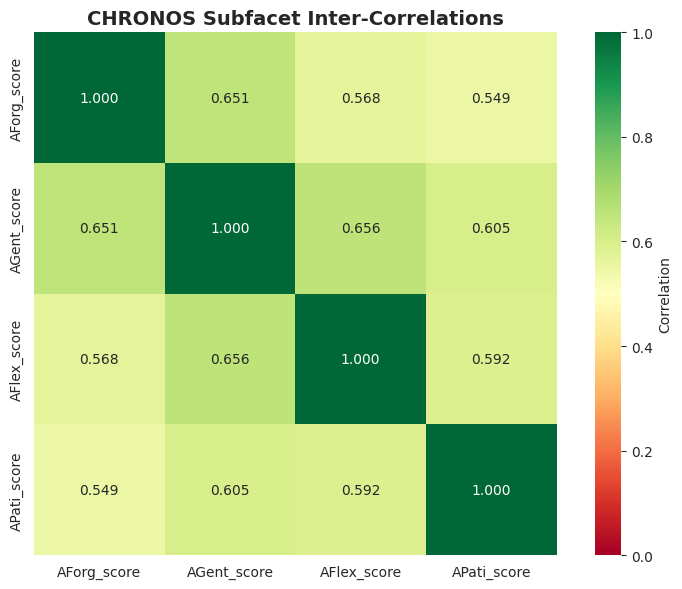

✅ Correlation heatmap displayed


In [10]:
# Visualize subfacet correlations
plt.figure(figsize=(8, 6))
sns.heatmap(subfacet_corr, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('CHRONOS Subfacet Inter-Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap displayed")

In [11]:
# Calculate item-total correlations (corrected)
# For each item, correlate with total score excluding that item
item_total_corrs = []

for item in chronos_items:
    # Total score excluding this item
    other_items = [i for i in chronos_items if i != item]
    total_without_item = chronos_df_scored[other_items].mean(axis=1)
    
    # Correlation between item and total (excluding item)
    corr = chronos_df_scored[item].corr(total_without_item)
    item_total_corrs.append({'item': item, 'correlation': corr})

item_total_df = pd.DataFrame(item_total_corrs)

print("\nITEM-TOTAL CORRELATIONS")
print(f"Average item-total correlation: {item_total_df['correlation'].mean():.3f}")
print(f"(Target: r > 0.30 for good discrimination)")

# Check if any items have low correlations
low_corr_items = item_total_df[item_total_df['correlation'] < 0.30]
if len(low_corr_items) > 0:
    print(f"\n⚠️ Items with low correlation (r < 0.30): {len(low_corr_items)}")
    print(low_corr_items)
else:
    print("\nAll items above threshold ✅")


ITEM-TOTAL CORRELATIONS
Average item-total correlation: 0.499
(Target: r > 0.30 for good discrimination)

⚠️ Items with low correlation (r < 0.30): 3
      item  correlation
11  AGent2     0.247619
20  AFlex1     0.271773
23  AFlex4     0.278295


In [12]:
# Distribution statistics
chronos_score = chronos_df_scored['CHRONOS_score']

print("\nDistribution Statistics:")
print(f"Mean:     {chronos_score.mean():.3f}")
print(f"Median:   {chronos_score.median():.3f}")
print(f"Std Dev:  {chronos_score.std():.3f}")
print(f"Skewness: {chronos_score.skew():.3f}")
print(f"Kurtosis: {chronos_score.kurtosis():.3f}")
print(f"Range:    {chronos_score.min():.3f} to {chronos_score.max():.3f}")


Distribution Statistics:
Mean:     3.989
Median:   4.000
Std Dev:  0.912
Skewness: -0.017
Kurtosis: -0.285
Range:    1.125 to 6.850


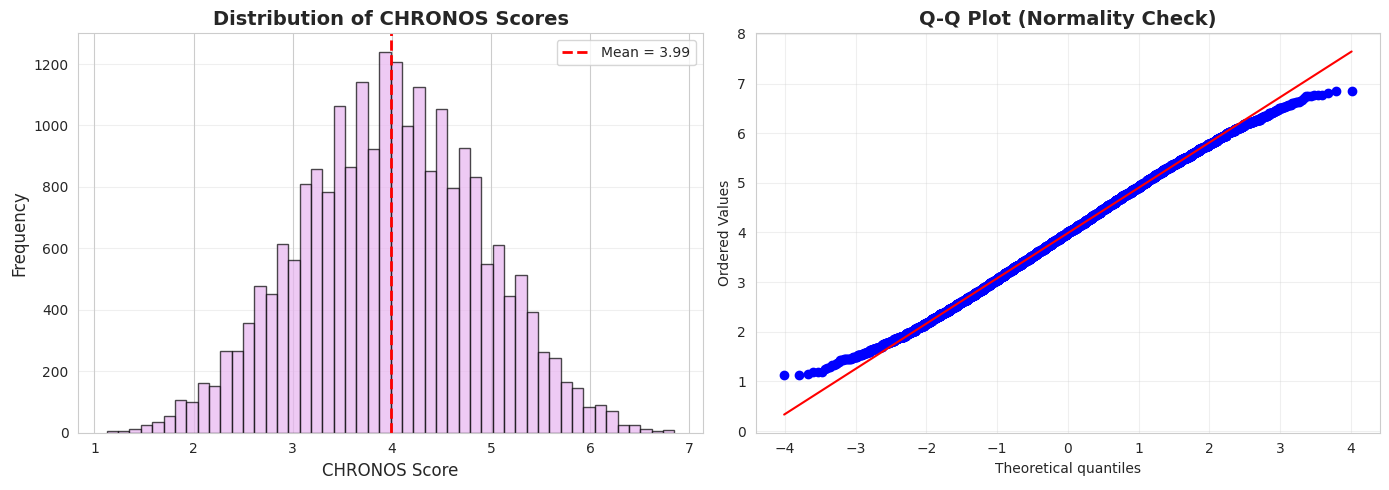

✅ Distribution visualizations displayed


In [13]:
# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(chronos_score, bins=50, color='#E8B4F0', edgecolor='black', alpha=0.7)
axes[0].axvline(chronos_score.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {chronos_score.mean():.2f}')
axes[0].set_xlabel('CHRONOS Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of CHRONOS Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Q-Q plot
stats.probplot(chronos_score, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution visualizations displayed")

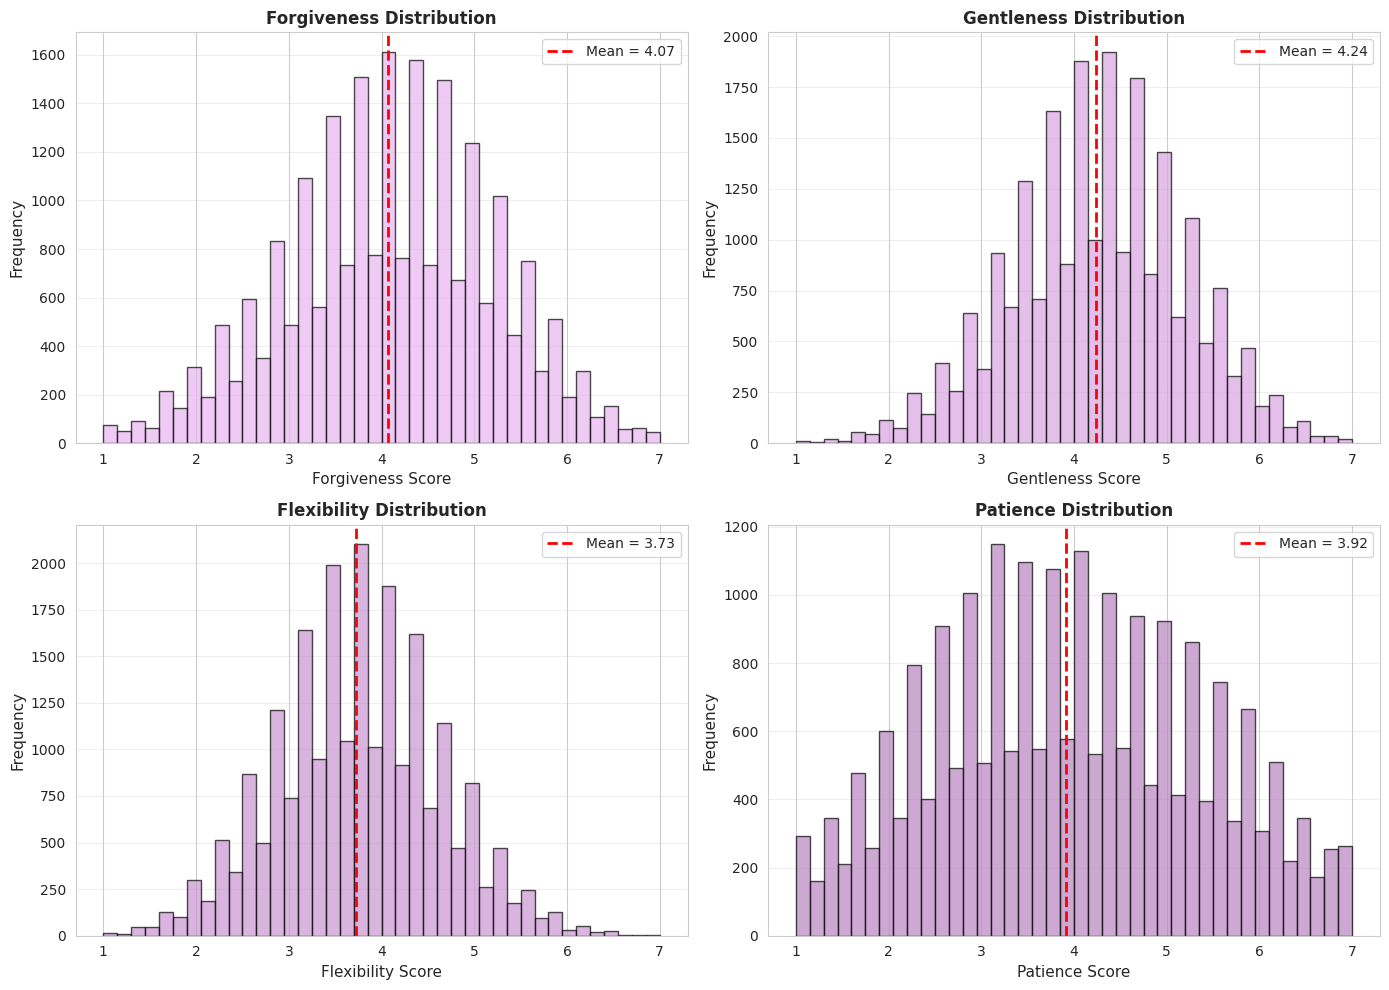

✅ Subfacet distributions displayed


In [14]:
# Visualize subfacet distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

subfacets = [
    ('AForg_score', 'Forgiveness', '#E8B4F0'),
    ('AGent_score', 'Gentleness', '#D8A4E0'),
    ('AFlex_score', 'Flexibility', '#C894D0'),
    ('APati_score', 'Patience', '#B884C0')
]

for idx, (score_col, label, color) in enumerate(subfacets):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    ax.hist(chronos_df_scored[score_col], bins=40, color=color, edgecolor='black', alpha=0.7)
    ax.axvline(chronos_df_scored[score_col].mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean = {chronos_df_scored[score_col].mean():.2f}')
    ax.set_xlabel(f'{label} Score', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{label} Distribution', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Subfacet distributions displayed")

## Validation Summary

### CHRONOS Dimension (A-Factor)
- **Source**: HEXACO Agreeableness factor
- **Items**: 40 items across 4 subfacets
- **Sample**: 20,000+ responses
- **Scale**: 7-point Likert

### Subfacets
1. **Forgiveness**: Letting go of grudges, trusting others, not seeking revenge
2. **Gentleness**: Non-judgmental, accepting, kind in speech
3. **Flexibility**: Adaptable, open to feedback, not stubborn
4. **Patience**: Slow to anger, rarely irritated, emotionally calm

### Interpretation
CHRONOS represents the ability to flow with time, maintain patience in adversity, and harmonize with others through forgiveness and flexibility. High scorers are patient, forgiving, gentle, and adaptable. Low scorers may be impatient, hold grudges, be quick to judge, and resist change.

This completes the validation of all 8 SELVE dimensions.